# Úovd

Tento dataset obsahuje výsledky průzkumu spokojenosti cestujících leteckou společností. Jaké faktory mají silnou korelaci se spokojeností (nebo nespokojeností) cestujících? Lze předpovědět spokojenost cestujících?


# Načtení knihoven

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Explorační analýza dat (Exploratory Data Analysis - EDA)

In [2]:
df = pd.concat([pd.read_csv("../datasets/projects/train.csv"),
                pd.read_csv("../datasets/projects/test.csv")], ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Popis dat

In [3]:
print(f"Počet řádků: {df.shape[0]}\nPočet atributů: {df.shape[1]}")

Počet řádků: 129880
Počet atributů: 25


In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

### Datový slovník

| **Atribut**                           | **Popis**                                                                   | **Datový typ** |
|:--------------------------------------|:----------------------------------------------------------------------------|:---------------|
| **Unnamed: 0**                        | Identifikátor řádku                                                         | `int64`        |
| **id**                                | Unikátní ID cestujícího                                                     | `int64`        |
| **Gender**                            | Pohlaví cestujících (Žena, Muž)                                             | `object`       |
| **Customer Type**                     | Typ zákazníka (Věrný zákazník, nevěrný zákazník)                            | `object`       |
| **Age**                               | Skutečný věk cestujících                                                    | `int64`        |
| **Type of Travel**                    | Účel letu cestujících (Osobní cesta, služební cesta)                        | `object`       |
| **Class**                             | Třída v letadle (Business, Economy, Economy Plus)                           | `object`       |
| **Flight Distance**                   | Délka letu v této cestě                                                     | `int64`        |
| **Inflight wifi service**             | Úroveň spokojenosti s Wi-Fi během letu (0: Neaplikovatelné; 1-5)            | `int64`        |
| **Departure/Arrival time convenient** | Úroveň spokojenosti s pohodlností času odletu/příletu                       | `int64`        |
| **Ease of Online booking**            | Úroveň spokojenosti s online rezervací                                      | `int64`        |
| **Gate location**                     | Úroveň spokojenosti s umístěním brány                                       | `int64`        |
| **Food and drink**                    | Úroveň spokojenosti s jídlem a pitím                                        | `int64`        |
| **Online boarding**                   | Úroveň spokojenosti s online odbavením                                      | `int64`        |
| **Seat comfort**                      | Úroveň spokojenosti s pohodlím sedadla                                      | `int64`        |
| **Inflight entertainment**            | Úroveň spokojenosti se zábavou během letu                                   | `int64`        |
| **On-board service**                  | Úroveň spokojenosti se službami na palubě                                   | `int64`        |
| **Leg room service**                  | Úroveň spokojenosti s prostorem pro nohy                                    | `int64`        |
| **Baggage handling**                  | Úroveň spokojenosti s manipulací se zavazadly                               | `int64`        |
| **Checkin service**                   | Úroveň spokojenosti s odbavením                                             | `int64`        |
| **Inflight service**                  | Úroveň spokojenosti se službami během letu                                  | `int64`        |
| **Cleanliness**                       | Úroveň spokojenosti s čistotou                                              | `int64`        |
| **Departure Delay in Minutes**        | Počet minut zpoždění při odletu                                             | `int64`        |
| **Arrival Delay in Minutes**          | Počet minut zpoždění při příletu                                            | `float64`      |
| **Satisfaction**                      | Úroveň spokojenosti cestujících (Spokojenost, neutrální nebo nespokojenost) | `object`       |

### Kontrola duplicitních hodnot

In [7]:
int(df.duplicated().sum())

0

Paráda, v datasetu nejsou žádné duplicitní hodnoty.

### Kontrola chybějících hodnot

In [8]:
columns_with_missing = df.columns[df.isnull().any()]
print(df[columns_with_missing].isnull().sum().apply(lambda x: f"{x} / {len(df)} ({(x / len(df) * 100):.2f}%)"))

Arrival Delay in Minutes    393 / 129880 (0.30%)
dtype: object


Máme jen jeden atribut s chybějícími hodnotami. Jedná se o atribut `Arrival Delay in Minutes`. Tento atribut obsahuje *393* hodnot, což představuje *0.30%* z celkového počtu řádků.

Chybějící hodnoty můžeme buď:
- nahradit průměrnou hodnotou
- odstranit chybějící hodnoty

Vzhledem k tomu, že se jedná o malý počet chybějících hodnot, můžeme chybějící hodnoty odstranit.

### Odstranění chybějících hodnot

In [9]:
df_copy = df.copy()

In [10]:
df_copy.dropna(inplace=True)

Taky je dobré zahodit sloupce `Unnamed: 0` a `id`, protože neobsahují žádné užitečné informace.

In [11]:
df_copy.drop(columns=["Unnamed: 0", "id"], inplace=True)

### Kódoání kategorických atributů

In [12]:
categorical_columns = df_copy.select_dtypes(include=["object"]).columns
print("\n".join(categorical_columns))

Gender
Customer Type
Type of Travel
Class
satisfaction


### Unikátní hodnoty kategorických atributů

In [13]:
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


### Hierarchie hodnot kategorických atributů

Jistou hierchii lze vidět u atributu `Class`. Třída `Economy Plus` je lepší než `Economy`, ale horší než `Business`.

Spekulovat by se dalo i nad `Satisfaction`, kde `neutral or dissatisfied` je horší než `satisfied`, ale tím, že se jedná o cílový atribut, který navíc hodnoty `neutral` a `dissatisfied` spojuje do jedné kategorie, tak toto je spíše spekulativní.

In [14]:
class_mapping = {
    "Eco": 1,
    "Eco Plus": 2,
    "Business": 3
}

In [15]:
df_copy["Class"] = df_copy["Class"].map(class_mapping)

In [16]:
print(df_copy["Class"].unique())

[2 3 1]


### Label encoding

In [17]:
binary_columns = df_copy.select_dtypes(include=["object"]).columns
for column in binary_columns:
    print(f"{column}: {df_copy[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
satisfaction: ['neutral or dissatisfied' 'satisfied']


Všechny tyto atributy můžeme zakódovat pomocí label encoding, jelikož se jedná o binární hodnoty, které nemají mezi sebou žádnou hierarchii.

In [18]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
    label_encoders[column] = le

In [19]:
for column in categorical_columns:
    print(f"{column}: {df_copy[column].unique()}")

Gender: [1 0]
Customer Type: [0 1]
Type of Travel: [1 0]
Class: [1 2 0]
satisfaction: [0 1]


## Visualizace dat

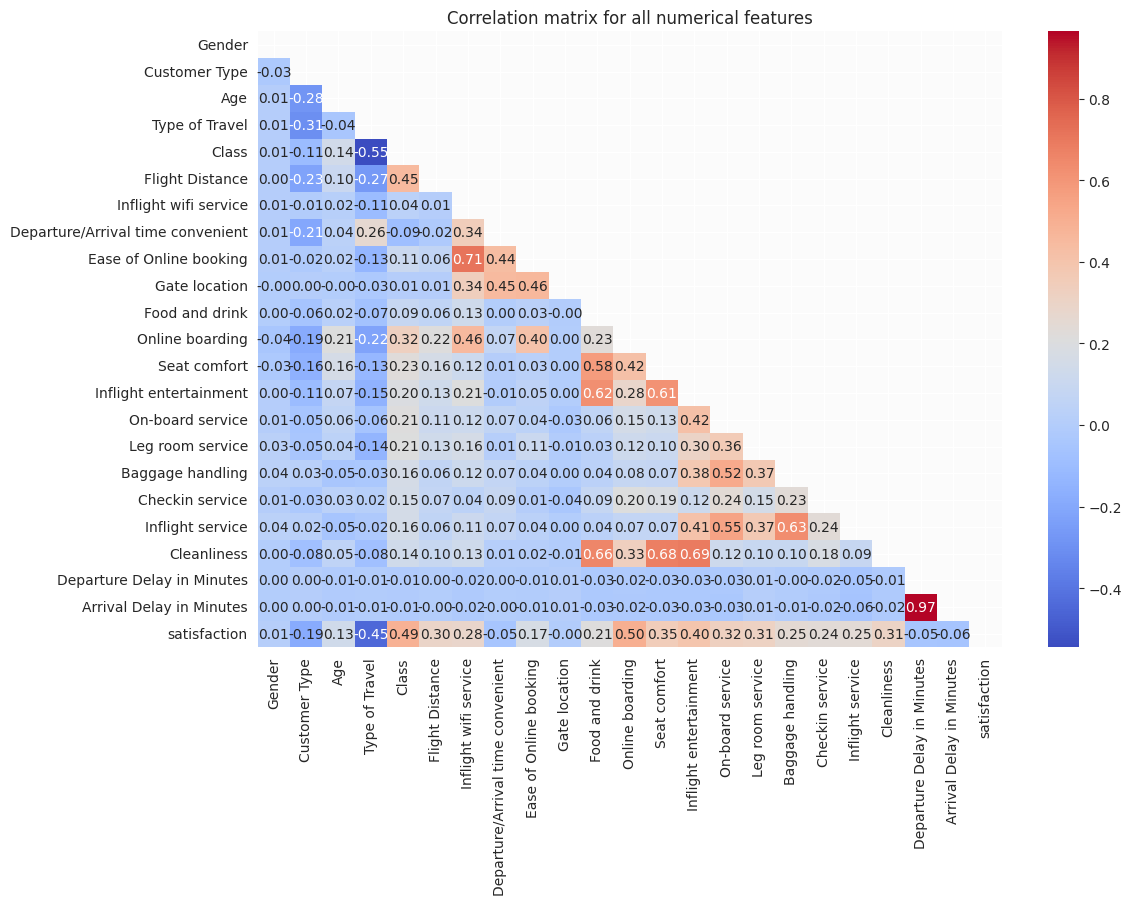

In [21]:
mask = np.triu(np.ones_like(df_copy.corr(), dtype=bool))

plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size": 10})
ax.set_title("Correlation matrix for all numerical features")
ax.set_facecolor("#FBFBFB")

plt.show()

##  Shluková analýza

_to be continued..._